In [ ]:
import os
import numpy as np
import cv2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_images_from_folder(folder_path, target_size=(92, 112)):
    images = []
    labels = []
    for subdir in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subdir)
        if not os.path.isdir(subfolder_path):
            continue
        if subdir[1:].isdigit():  # Assuming subdir names start with a non-digit character followed by digits
            label = int(subdir[1:])
        else:
            print(f"Skipping folder: {subdir} (invalid name format)")
            continue
        for filename in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, filename)
            if not file_path.endswith(".pgm"):
                continue
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Failed to load image: {file_path}")
                continue
            resized_image = cv2.resize(image, target_size)
            images.append(resized_image)
            labels.append(label)
    return np.array(images), np.array(labels)

dataset_folder = "drive/MyDrive/ORL"
images, labels = load_images_from_folder(dataset_folder)

print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))

Number of images loaded: 400
Number of labels loaded: 400


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(320, 112, 92)

In [ ]:
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))
d2_train_dataset

array([[131, 125, 126, ...,  89,  93,  91],
       [121, 121, 122, ...,  96,  98, 100],
       [124, 124, 123, ...,  99, 102,  95],
       ...,
       [ 37,  34,  38, ..., 135, 143, 133],
       [120, 120, 120, ...,  82,  87,  79],
       [103, 105, 104, ...,  44,  38,  43]], dtype=uint8)

In [ ]:
nsamples, nx, ny = X_test.shape
d2_test_dataset = X_test.reshape((nsamples,nx*ny))
d2_test_dataset

array([[122, 123, 122, ...,  98, 101,  85],
       [ 38,  46,  38, ...,  27,  23,  26],
       [112, 115, 120, ...,  53,  53,  54],
       ...,
       [119, 121, 123, ...,  73,  74,  76],
       [ 46,  41,  45, ...,  37,  34,  43],
       [ 46,  45,  42, ...,  24,  21,  24]], dtype=uint8)

In [ ]:
n=80
pca=PCA(n_components=n,random_state=42)
X_train_pca=pca.fit_transform(d2_train_dataset)
X_test_pca=pca.transform(d2_test_dataset)

In [ ]:
svm_classifier=SVC()
svm_classifier.fit(X_train_pca,y_train)

SVC()

In [ ]:
y_pred=svm_classifier.predict(X_test_pca)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9875


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


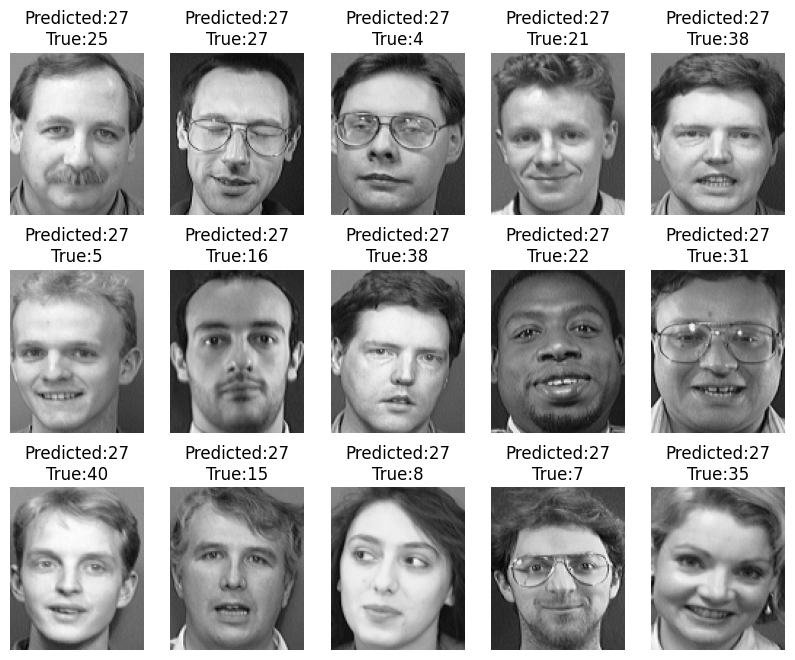

In [ ]:
plt.figure(figsize=(10,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(X_test[i],cmap='gray')
  plt.title(f"Predicted:{y_pred[1]}\nTrue:{y_test[i]}")
  plt.axis("off")
plt.show()

In [ ]:
##Testing
from skimage.io import imread
from skimage.transform import resize
pgm_image_path='drive/MyDrive/ORL/s35/5.pgm'
pgm_image=imread(pgm_image_path)
nsamples, nx, ny=(1,92,112)
flattened_image=pgm_image.reshape((nsamples,nx*ny))
image_pca=pca.transform(flattened_image)
predicted_label=svm_classifier.predict(image_pca)
predicted_label

array([35])

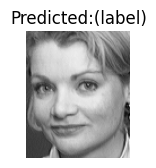

In [ ]:
plt.figure(figsize=(180,100))
for i,(image,label)in enumerate(zip(pgm_image,predicted_label)):
  plt.subplot(1,len(pgm_image),1)
  plt.imshow(pgm_image,cmap="gray")
  plt.title(f"Predicted:(label)")
  plt.axis("off")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import os # import the os module
import cv2
import numpy as np


def load_images_from_folder(folder_path, target_size=(92, 112)):
    images = []
    labels = []
    for subdir in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subdir)
        if not os.path.isdir(subfolder_path):
            continue
        if subdir[1:].isdigit():  # Assuming subdir names start with a non-digit character followed by digits
            label = int(subdir[1:])
        else:
            print(f"Skipping folder: {subdir} (invalid name format)")
            continue
        for filename in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, filename)
            if not file_path.endswith(".pgm"):
                continue
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Failed to load image: {file_path}")
                continue
            resized_image = cv2.resize(image, target_size)
            images.append(resized_image)
            labels.append(label)
    return np.array(images), np.array(labels)


In [32]:
dataset_folder = "drive/MyDrive/ORL"  # Update with your dataset path
images, labels = load_images_from_folder(dataset_folder)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [34]:
# Reshape X_train
nsamples_train, nx_train, ny_train = X_train.shape
d2_train_dataset = X_train.reshape((nsamples_train, nx_train * ny_train))

# Reshape X_test (using different variable names)
nsamples_test, nx_test, ny_test = X_test.shape
d2_test_dataset = X_test.reshape((nsamples_test, nx_test * ny_test))

In [35]:
n = 80
pca = PCA(n_components=n, random_state=42)
X_train_pca = pca.fit_transform(d2_train_dataset)
X_test_pca = pca.transform(d2_test_dataset)


In [36]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)


RandomForestClassifier(random_state=42)

In [37]:
y_pred = rf_classifier.predict(X_test_pca)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]


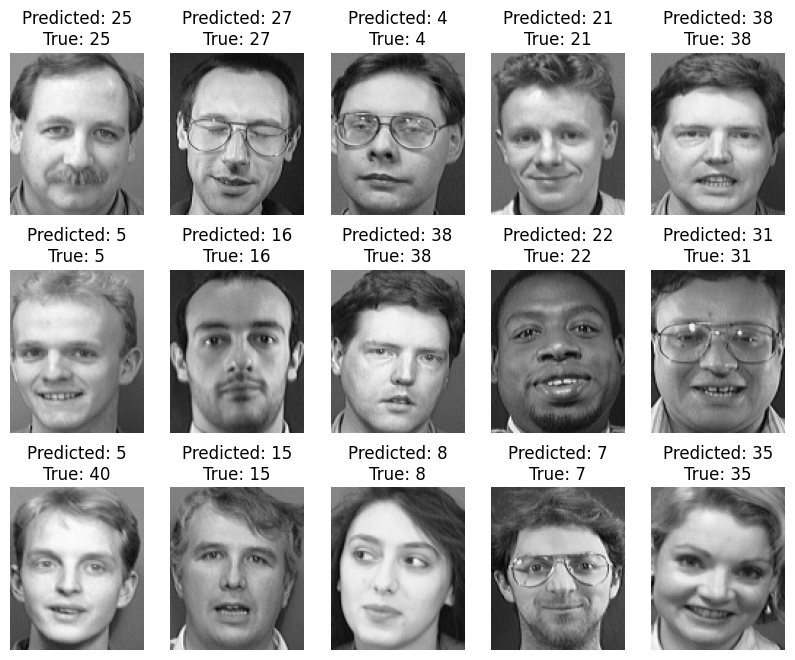

In [39]:
plt.figure(figsize=(10, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis("off")
plt.show()


In [40]:
pgm_image_path = 'drive/MyDrive/ORL/s35/5.pgm'
pgm_image = imread(pgm_image_path)


In [43]:
# Get image dimensions
nx = pgm_image.shape[1]  # Width
ny = pgm_image.shape[0]  # Height

flattened_image = pgm_image.reshape((1, nx * ny))

In [44]:
image_pca = pca.transform(flattened_image)

In [45]:
predicted_label = rf_classifier.predict(image_pca)
print("Predicted Label:", predicted_label)

Predicted Label: [35]


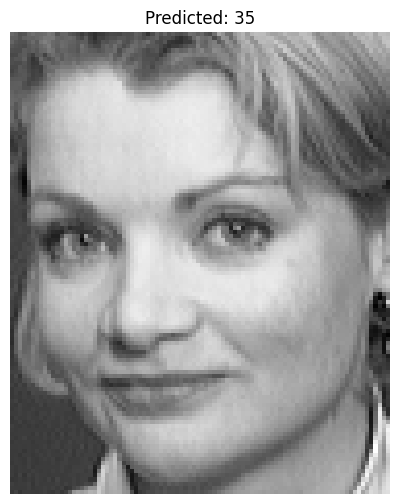

In [46]:
plt.figure(figsize=(8, 6))
plt.imshow(pgm_image, cmap="gray")
plt.title(f"Predicted: {predicted_label[0]}")
plt.axis("off")
plt.show()